<a href="https://colab.research.google.com/github/GreenRamSilgen/StockMarketPrediction/blob/master/StockPredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#START Import
#numpy
import numpy as np
import math

#pandas
import pandas as pd
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame

#matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib as mpl

#sklearn
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, svm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

#tensorflow
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv1D, LSTM, Dense
from keras.callbacks import LearningRateScheduler
from tensorflow.keras.losses import Huber
from keras.optimizers import SGD

In [45]:
style.use('ggplot')
#Acquiring data from yahoo finance with pandas-datareader
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2019, 8, 31)

df = web.DataReader("AAPL", 'yahoo', start, end)

close_px = df['Adj Close']
#mavg = close_px.rolling(window=100).mean()
print(df.tail())

df['HL_PCT'] = (df['High'] - df['Low'])/df['Low'] * 100.0
df['OC_PCT'] = (df['Close'] - df['Open'])/df['Open'] * 100.0

df = df[['Adj Close', 'HL_PCT', 'OC_PCT', 'Volume']]

                  High         Low  ...      Volume   Adj Close
Date                                ...                        
2019-08-26  207.190002  205.059998  ...  26043600.0  206.490005
2019-08-27  208.550003  203.529999  ...  25873300.0  204.160004
2019-08-28  205.720001  203.320007  ...  15938800.0  205.529999
2019-08-29  209.320007  206.660004  ...  20990500.0  209.009995
2019-08-30  210.449997  207.199997  ...  21143400.0  208.740005

[5 rows x 6 columns]


In [0]:
#Adding an output label in the df
predict_this = 'Adj Close'
df.fillna(-99999, inplace=True)
predict_length = 32#int(math.ceil(0.02*len(df)))

df['label'] = df[predict_this].shift(-predict_length)

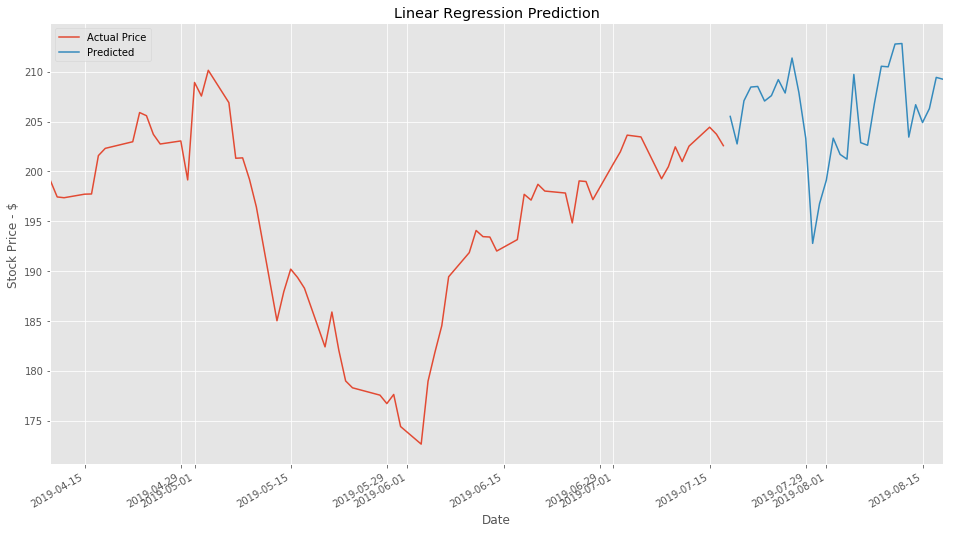

In [47]:
X = np.array(df.drop(['label'],1))
X = preprocessing.scale(X)
X_lately = X[-predict_length:]
X = X[:-predict_length]


df.dropna(inplace=True)
Y = np.array(df['label'])


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2)

classifier = LinearRegression()
classifier.fit(X_train, Y_train)

accuracy = classifier.score(X_test, Y_test)

prediction = classifier.predict(X_lately)

df['Prediction'] = np.nan

last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in prediction:
  next_date = datetime.datetime.fromtimestamp(next_unix)
  next_unix += one_day
  df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]
  
df=df[-100:]
df['Adj Close'].plot(label='Actual Price', figsize=(16,9), title='Linear Regression Prediction')
df['Prediction'].plot(label='Predicted')
plt.ylabel("Stock Price - $")
plt.legend()
plt.show()



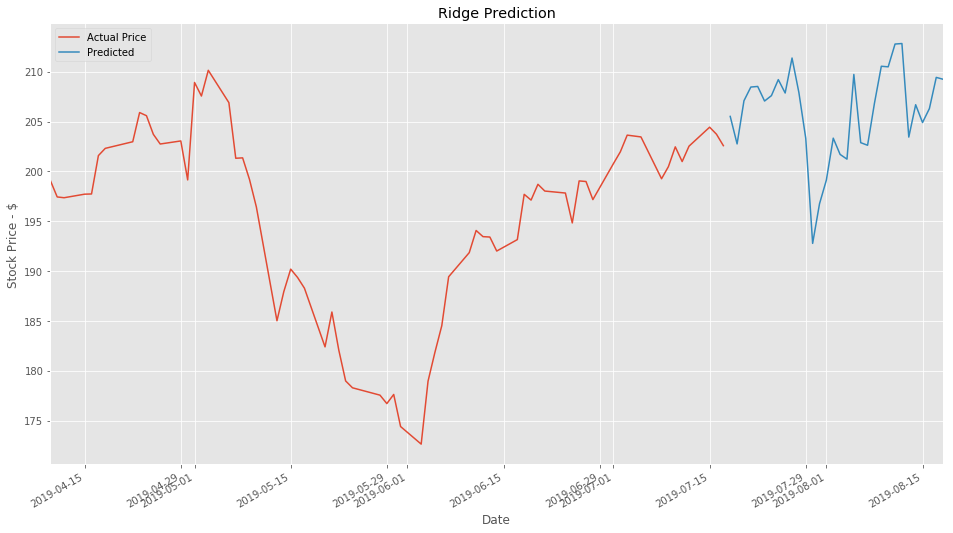

In [48]:
classifier = Ridge()
classifier.fit(X_train, Y_train)

accuracy = classifier.score(X_test, Y_test)

prediction = classifier.predict(X_lately)


  
df=df[-100:]
df['Adj Close'].plot(label='Actual Price', figsize=(16,9), title='Ridge Prediction')
df['Prediction'].plot(label='Predicted')
plt.ylabel("Stock Price - $")
plt.legend()
plt.show()



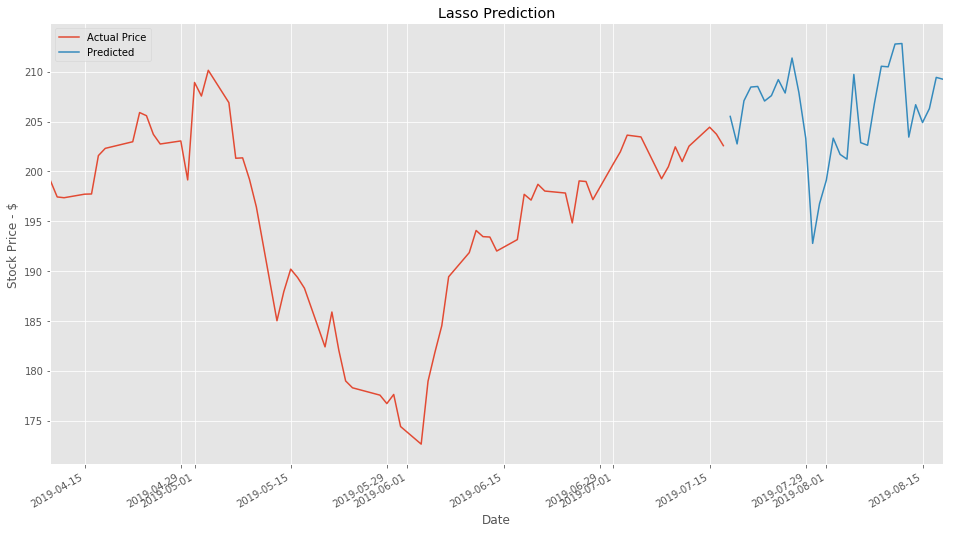

In [49]:
classifier = Lasso()
classifier.fit(X_train, Y_train)

accuracy = classifier.score(X_test, Y_test)

prediction = classifier.predict(X_lately)


  
df=df[-100:]
df['Adj Close'].plot(label='Actual Price', figsize=(16,9), title='Lasso Prediction')
df['Prediction'].plot(label='Predicted')
plt.ylabel("Stock Price - $")
plt.legend()
plt.show()